### Topic Ideas
* Interviews
* Rejections
* Prefrosh (flair)
* [GUIDE]

# Scraping Reddit Comments

In [1]:
import praw
import pandas as pd
import configparser
import numpy as np
from praw.models import MoreComments

In [2]:
!pwd

/home/chadharness/w210/webscraping


## Get Configuration Parameters

In [3]:
config = configparser.ConfigParser()
config.read('../config/reddit.config')

['../config/reddit.config']

## Instantiate PRAW Object

In [4]:
reddit = praw.Reddit(client_id=config['REDDIT_CONFIG']['client_id'],
                     client_secret=config['REDDIT_CONFIG']['client_secret'],
                     password=config['REDDIT_CONFIG']['password'],
                     user_agent=config['REDDIT_CONFIG']['user_agent'],
                     username=config['REDDIT_CONFIG']['username'])

In [5]:
for submission in reddit.subreddit('The_Donald').hot(limit=10):
    print(submission.title)

So funny to watch the Fake News, especially NBC and CNN. They are fighting hard to downplay the deal with North Korea. 500 days ago they would have “begged” for this deal-looked like war would break out. Our Country’s biggest enemy is the Fake News so easily promulgated by fools!
Tomorrow (June 14th) is the 72nd Birthday of our VSG God Emperor - President Donald John Trump! Which means it's time for a POTUS BIRTHDAY SIDEBAR CONTEST!!
My political representatives didn’t want me to get involved in the Mark Sanford primary thinking that Sanford would easily win - but with a few hours left I felt that Katie was such a good candidate, and Sanford was so bad, I had to give it a shot. Congrats to Katie Arrington!
The Pulse Nightclub shooting was not the work of a self-loathing gay man or mentally ill individual. It was, say it with me, RADICAL 👏 ISLAMIC 👏 TERRORISM 👏
Muslims complain about being subjected to airport security measures that all passengers face because of Muslims
Before taking o

### Take a Peek at The_Donald Subreddit

In [6]:
subreddit = reddit.subreddit('The_Donald')

In [7]:
print(subreddit.display_name)  # Output: redditdev
print(subreddit.title)         # Output: reddit Development

The_Donald
The Donald - America First!


## Grab Some Posts

In [8]:
for submission in subreddit.top(limit=5):
    print(submission.title)  # Output: the submission's title
    print(submission.score)  # Output: the submission's score
    print(submission.id)     # Output: the submission's ID
    print(submission.url)    # Output: the URL the submission points to

DONALD J. TRUMP DECLARED THE WINNER!
66712
5bzjv5
https://www.reddit.com/r/The_Donald/comments/5bzjv5/donald_j_trump_declared_the_winner/
I’m Donald J. Trump and I'm Your Next President of the United States.
42116
4uxdbn
https://www.reddit.com/r/The_Donald/comments/4uxdbn/im_donald_j_trump_and_im_your_next_president_of/
The New Algorithm Was Designed To Keep President Trump From The Front Page... But Sadly, That Won't Happen.
40970
5gvy1j
https://i.sli.mg/gu0oHA.png
CNN will soon be #1...when searching for the term "Fake News". Congratulations to CNN on this major achievement.
37276
5jt9xs
https://i.redd.it/7jeyhzgku65y.png
ALL CELEBRITIES THAT VOWED TO LEAVE THE U.S.A. IF TRUMP WINS, WE NOW DEMAND YOU TO FOLLOW THROUGH!!!! OUT! OUT! OUT!
36618
5bz5ds
https://www.reddit.com/r/The_Donald/comments/5bz5ds/all_celebrities_that_vowed_to_leave_the_usa_if/


## View Comments

In [11]:
submission = reddit.submission(id='5gvy1j')
line = 0
for top_level_comment in submission.comments:
    line += 1
    print(top_level_comment.body)
    if line == 5:
        break

Can anyone eli5 with this vote fuzzing and why we have 10k and 16k uptendies on our threads?
We are going to lose our minds once we get real pics of him in the oval office
Upvote everything!
fuck the front page of reddit. DONALD J. TRUMP IS GOING TO BE ON THE FRONT PAGE OF THE WORLD. 
I'm not sure about that.  The_donald isn't in the top 200 on my front page.  I had to come here to figure out what's going on.  Definitely some censorship going on.  AGAIN, this is my home page not r/all.

Edit: I came back 2 hours later and checked again.  I stopped looking after I found not one the_donald post in my top 700 on my home page.

2nd Edit:  On r/all there's one T_D post at #2. But if logged out and go with incognito mode the #2 post disappears all together and T_D no more.


## Selected Thread Comments

In [12]:
submission_url = 'https://www.reddit.com/r/The_Donald/comments/5gvy1j/the_new_algorithm_was_designed_to_keep_president/'

In [13]:
submission = reddit.submission(url=submission_url)

In [14]:
x = 0

from collections import defaultdict

comments_dict = defaultdict()
for top_level_comment in submission.comments:
    print("=============NEW COMMMENT=============")
    print('Comment ID:',top_level_comment)
    print('Comment Body:', top_level_comment.body)
    print('Comment Author:', top_level_comment.author)
    print('Comment Author Flair CSS:',top_level_comment.author_flair_css_class)
    print('Comment Author Flair Text',top_level_comment.author_flair_text)
    print('Comment Body Controversaility:', top_level_comment.controversiality)
    print('Comment Created:', top_level_comment.created)
    print('Comment Created UTC:', top_level_comment.created_utc)
    print('Comment Depth', top_level_comment.depth)
    print('Comment Downvotes', top_level_comment.downs)
    print('Comment UpVotes', top_level_comment.ups)
    print('Comment Score', top_level_comment.score)
    print('Comment Submission', top_level_comment.submission)
    print('Comment User Reports', top_level_comment.user_reports)
    print('Comment Subreddit', top_level_comment.subreddit)
    print('Comment Post', top_level_comment.submission)
    print('Submission Title: ', submission.title)
    print('Submission Score: ', submission.score)
    
    comments_dict['Comment ID'] = top_level_comment
    comments_dict['Comment Body'] = top_level_comment
    break

=============NEW COMMMENT=============
Comment ID: davk6hv
Comment Body: Can anyone eli5 with this vote fuzzing and why we have 10k and 16k uptendies on our threads?
Comment Author: lord-helmet
Comment Author Flair CSS: None
Comment Author Flair Text None
Comment Body Controversaility: 0
Comment Created: 1481095977.0
Comment Created UTC: 1481067177.0
Comment Depth 0
Comment Downvotes 0
Comment UpVotes 1146
Comment Score 1146
Comment Submission 5gvy1j
Comment User Reports []
Comment Subreddit The_Donald
Comment Post 5gvy1j
Submission Title:  The New Algorithm Was Designed To Keep President Trump From The Front Page... But Sadly, That Won't Happen.
Submission Score:  40965


## Write to CSV

In [15]:
submission.comments.replace_more(limit=1)
with open('test.csv', 'w') as f:
    for top_level_comment in submission.comments:
        f.write(top_level_comment.name)
        f.write(',')        
        comment_parsed = top_level_comment.body.replace('\n',' ').replace('\t',' ').replace(',',' ')
        if top_level_comment.author is None:
            f.write('NO AUTHOR')
        else:
            f.write(top_level_comment.author.name)
        f.write(',')
        if top_level_comment.author_flair_text is None:
            f.write('NO FLAIR')
        else:
            f.write(top_level_comment.author_flair_text)
        f.write(',')
        f.write(str(top_level_comment.score))
        f.write(',')
        f.write(comment_parsed)
        f.write('\n')

# Read Results

In [16]:
df = pd.read_csv('test.csv', index_col=0, names=['ID','User','Flair','Score','Body'])
df.head()

,User,Flair,Score,Body
ID,,,,
t1_davk6hv,lord-helmet,NO FLAIR,1146,Can anyone eli5 with this vote fuzzing and why...
t1_davmr3f,dawilly97,CO,318,We are going to lose our minds once we get rea...
t1_davhapd,NO AUTHOR,NO FLAIR,1183,Upvote everything!
t1_davq0kr,smawwww,CA,126,fuck the front page of reddit. DONALD J. TRUMP...
t1_davjzsi,neutralstrike,NO FLAIR,279,I'm not sure about that. The_donald isn't in ...


In [17]:
df.shape

(238, 4)

In [18]:
df.sort_values('Score')['Body'][0]

'[removed]'

In [21]:
submission = reddit.submission(url=submission_url)
submission.comments.replace_more(limit=1)
comment_queue = submission.comments[:]  # Seed with top-level
comment_number = 1
with open('test.csv', 'w') as f:
    while comment_queue:
        comment = comment_queue.pop(0)
        f.write(comment.name)
        f.write(',')
        f.write(str(comment.depth))
        f.write(',')
        comment_parsed = comment.body.replace('\n',' ').replace('\t',' ').replace(',',' ')
        if comment.author is None:
            f.write('NO AUTHOR')
        else:
            f.write(comment.author.name)
        f.write(',')
        if comment.author_flair_text is None:
            f.write('NO FLAIR')
        else:
            f.write(comment.author_flair_text)
        f.write(',')
        f.write(str(comment.score))
        f.write(',')
        f.write(comment_parsed)
        f.write('\n')
        #print('=============Comment Number {}============='.format(comment_number))
        #print('=========Comment Depth: {}======='.format(comment.depth))
        # print(comment.body)
        comment_queue.extend(comment.replies)
        comment_number += 1

In [22]:
df = pd.read_csv('test.csv', index_col=0, names=['ID','Depth','User','Flair','Score','Body'])

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [31]:
df.shape

(34, 5)

In [23]:
df.head()

,Depth,User,Flair,Score,Body
ID,,,,,
t1_e0jxq9j,0,echoacm,Prefrosh,293,joke's on you I didn't learn anything in AP E...
t1_e0k9qsr,0,CornHellUniversity,NO FLAIR,45,All I remember from AP Eng is Ethos Pathos L...
t1_e0jy6sx,0,OwenLeaf,HS Junior,95,I feel bad for you guys if this is what your A...
t1_e0k27ct,0,holdenthe,NO FLAIR,23,i kinda realized this when i tried to write my...
t1_e0k5gtx,0,pachacuti092,HS Senior,19,Jokes on u cuz I didn’t even take ap English


In [30]:
df.loc[df['Depth'] == 1].sort_values('Score').head()

,Depth,User,Flair,Score,Body
ID,,,,,
t1_e0lc77o,1,N4_IS_PLS,Senior,1,Read write revise. Read at least 30 minute...
t1_e0lasgb,1,305rose,Prefrosh,2,record yourself speaking your essay and then c...
t1_e0kzfsa,1,ScholarGrade,MBA,3,I mean ee cummings went to Harvard without it...
t1_e0kz9dh,1,ScholarGrade,MBA,3,Wow you had a great teacher then. I've heard ...
t1_e0kmdl6,1,ScholarGrade,MBA,4,Many AOs will go back periodically throughout ...


## Plot Depth/Score

In [32]:
df.plot(x='Depth', y='Score', kind='scatter', figsize=(15,10))

### Groupby Flair

In [33]:
df['First Flair'] = df.apply(lambda x: x['Flair'].split(' / ')[0], axis=1)
#df['Second Flair'] = df.apply(lambda x: x['Flair'].split(' / ')[1], axis=1)

In [34]:
grouped_by_flair = df.groupby('First Flair')

In [35]:
average_score = grouped_by_flair.aggregate(np.average).sort_values('Score')

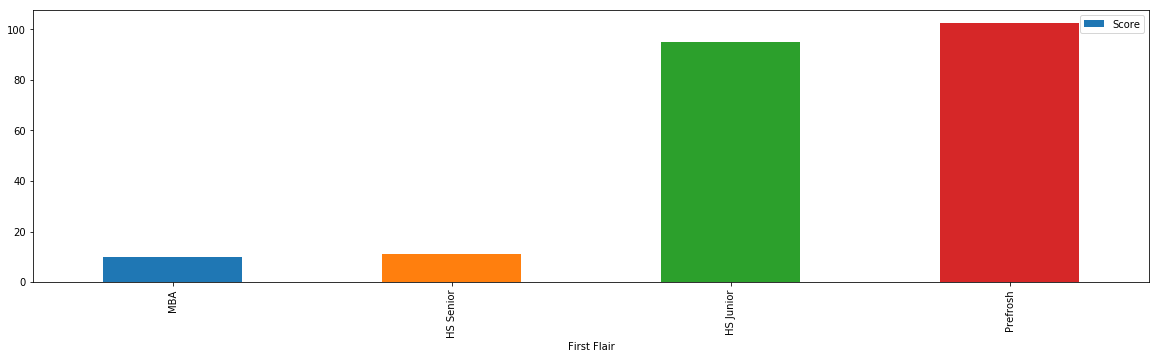

In [40]:
average_score.loc[average_score['Score']>=10].plot(y='Score', kind='bar',figsize=(20,5))

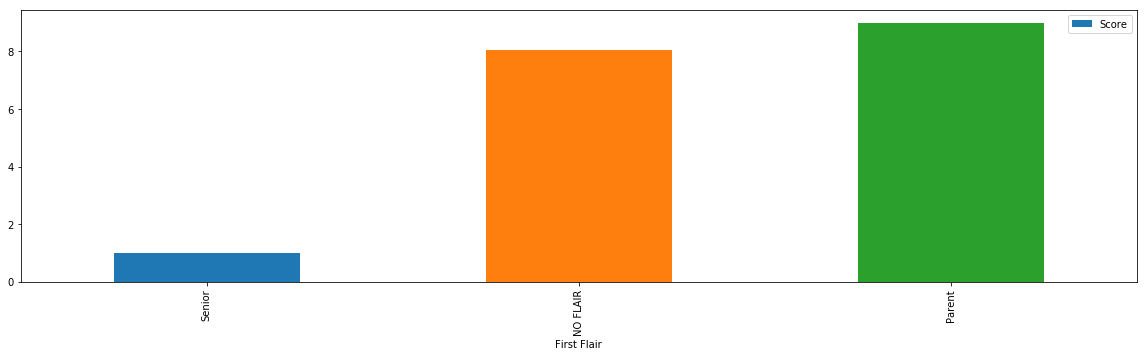

In [41]:
average_score.loc[average_score['Score']< 10].plot(y='Score', kind='bar',figsize=(20,5))